In [5]:
import pandas as pd
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv('Train.csv')

In [7]:
x=df.values[:,1:54]

In [8]:
x

array([[2596,   51,    3, ...,    0,    0,    0],
       [2590,   56,    2, ...,    0,    0,    0],
       [2804,  139,    9, ...,    0,    0,    0],
       ...,
       [2492,  134,   25, ...,    0,    0,    0],
       [2487,  167,   28, ...,    0,    0,    0],
       [2475,  197,   34, ...,    0,    0,    0]])

In [9]:
y=df.values[:,-1]

In [10]:
y

array([5, 5, 2, ..., 3, 3, 3])

<b>Knn Classifier:</b>

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.8389550264550265

In [10]:
predictionsDT=knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictionsDT))

[[325  54   0   0  10   1  45]
 [ 87 241  16   0  49  18   7]
 [  0   7 321  35  13  38   0]
 [  0   0  11 433   0   7   0]
 [  5   6   4   0 413   2   0]
 [  1   8  33  19   2 370   0]
 [  7   2   0   0   0   0 434]]


<b>Naive bayes:</b>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [13]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print("Accuracy:",gnb.score(x_test, y_test))

Accuracy: 0.6018518518518519


In [14]:
predictionsNB=gnb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictionsNB))

[[323   7   1   0  42   1  61]
 [206  53  34   1 108   1  15]
 [  1   0 320  80  12   1   0]
 [  0   0  36 415   0   0   0]
 [ 56   6  59   0 308   1   0]
 [  8   0 287  74  36  28   0]
 [ 61   2   3   0   4   0 373]]


<b>Random Forest Using sklearn:</b>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [17]:
rcl=RandomForestClassifier(n_estimators=100)
rcl.fit(x_train,y_train)
print("Accuracy:",rcl.score(x_test,y_test))

Accuracy: 0.8637566137566137


In [18]:
predictionsRF=rcl.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictionsRF))

[[337  67   1   0   5   0  25]
 [ 63 299   9   0  25  14   8]
 [  0   4 335  21   5  49   0]
 [  0   0  12 434   0   5   0]
 [  1  12   5   0 407   5   0]
 [  0   3  39  13   3 375   0]
 [ 18   0   0   0   0   0 425]]


<b>Gradient Boosting Using sklearn:</b>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [21]:
gbr=GradientBoostingClassifier(n_estimators=500) 
gbr.fit(x_train, y_train) 
print("Accuracy:",gbr.score(x_test,y_test))

Accuracy: 0.845568783068783


In [22]:
predictionsGB=gbr.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictionsGB))

[[338  66   1   0   4   0  26]
 [ 76 270   9   0  46  10   7]
 [  0   5 323  19  10  56   1]
 [  0   0  12 434   0   5   0]
 [  3  16   5   0 400   6   0]
 [  2   5  50   9   4 363   0]
 [ 12   1   0   0   1   0 429]]


<b>Feed Forward Neural Network:</b>

In [2]:
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
#loading the data
covtype = pd.read_csv("Train.csv", sep=",")
covtype = covtype.reindex(
    np.random.permutation(covtype.index)) # randomize the position of records

In [4]:
covtype.head() #checking the data index was radomized

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
8898,8899,2885,67,18,190,106,2097,235,200,90,...,0,1,0,0,0,0,0,0,0,2
2332,2333,2782,330,21,30,16,1550,165,209,181,...,0,0,0,0,0,0,0,0,0,6
9295,9296,3263,143,19,180,39,2873,243,233,110,...,0,0,0,0,0,0,0,1,0,1
1819,1820,2570,345,12,124,42,859,196,221,163,...,0,0,0,0,0,0,0,0,0,5
10703,10704,3160,77,9,470,49,424,232,223,122,...,0,0,0,0,0,0,0,0,0,1


In [5]:
covtype.shape #number of records

(15120, 56)

In [6]:
covtype['Cover_Type'].unique()

array([2, 6, 1, 5, 4, 3, 7])

In [7]:
covtype['Cover_Type']=covtype['Cover_Type'].astype('category') # convert to categorical datatype for multiple output prediction

In [8]:
#target is categorical data, we convert it into dummies
dummies= pd.get_dummies(covtype, columns=['Cover_Type'])

In [9]:
dummies.shape

(15120, 62)

In [10]:
one_hot_code=dummies # assign dataset to one_hot_code

#one_hot_code=covtype
one_hot_code.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
8898,8899,2885,67,18,190,106,2097,235,200,90,...,0,0,0,0,1,0,0,0,0,0
2332,2333,2782,330,21,30,16,1550,165,209,181,...,0,0,0,0,0,0,0,0,1,0
9295,9296,3263,143,19,180,39,2873,243,233,110,...,0,1,0,1,0,0,0,0,0,0
1819,1820,2570,345,12,124,42,859,196,221,163,...,0,0,0,0,0,0,0,1,0,0
10703,10704,3160,77,9,470,49,424,232,223,122,...,0,0,0,1,0,0,0,0,0,0


In [11]:
one_hot_code.columns #easier to copy column names for next code

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [12]:
one_hot_code

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
8898,8899,2885,67,18,190,106,2097,235,200,90,...,0,0,0,0,1,0,0,0,0,0
2332,2333,2782,330,21,30,16,1550,165,209,181,...,0,0,0,0,0,0,0,0,1,0
9295,9296,3263,143,19,180,39,2873,243,233,110,...,0,1,0,1,0,0,0,0,0,0
1819,1820,2570,345,12,124,42,859,196,221,163,...,0,0,0,0,0,0,0,1,0,0
10703,10704,3160,77,9,470,49,424,232,223,122,...,0,0,0,1,0,0,0,0,0,0
12578,12579,2111,308,5,0,0,1025,205,237,171,...,0,0,0,0,0,0,1,0,0,0
256,257,3011,85,5,842,85,5389,228,231,137,...,0,0,0,0,1,0,0,0,0,0
13147,13148,2321,18,10,0,0,283,213,220,143,...,0,0,0,0,0,0,1,0,0,0
3984,3985,2152,45,14,0,0,1167,223,210,118,...,0,0,0,0,0,0,1,0,0,0
1254,1255,2987,352,13,228,14,2554,197,218,158,...,0,0,0,1,0,0,0,0,0,0


In [13]:
mean_tr=1
std_tr=1

In [14]:
def preprocess_features(one_hot_code, batch_norm_required):
    selected_features = one_hot_code[ # features that will be used for training data
    [ 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']]
    batch_norm = selected_features[['Aspect','Elevation',  'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']] 
    if batch_norm_required:
        global mean_tr, std_tr
        mean_tr=batch_norm.mean()
        std_tr=batch_norm.std()
     
    batch_norm=(batch_norm-mean_tr)/std_tr
    selected_features.update(batch_norm)

        
    # Add noise
    processed_features = selected_features.copy()  
    
    return selected_features

def preprocess_targets(one_hot_code): # targets that are used for adjusting the model
    output_targets = one_hot_code[
        [ 
        'Cover_Type_1' , 'Cover_Type_2',
       'Cover_Type_3', 'Cover_Type_4', 'Cover_Type_5', 'Cover_Type_6',
       'Cover_Type_7'
        ]]
    return output_targets

In [15]:
# Train and test sets
# Choose examples for training.
training_examples = preprocess_features(one_hot_code.head(464808), 1)
training_targets = preprocess_targets(one_hot_code.head(464808))

# Choose examples for validation.
validation_examples = preprocess_features(one_hot_code.tail(116203), 0)
validation_targets = preprocess_targets(one_hot_code.tail(116203))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

/home/phanindra/.local/lib/python3.6/site-packages/pandas/core/frame.py:5085: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


Training examples summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,3.512769e-16,1.184238e-16,-2.027772e-16,1.691768e-17,-1.386310e-17,1.043257e-16,-4.027349e-16,4.929625e-16,6.626093e-17,1.009187e-16,...,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,-2.122023e+00,-1.423223e+00,-1.951943e+00,-1.081497e+00,-3.218132e+00,-1.293538e+00,-6.959926e+00,-5.261196e+00,-2.943489e+00,-1.373850e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.938043e-01,-8.327745e-01,-7.690612e-01,-7.625633e-01,-7.523999e-01,-7.169627e-01,-5.465836e-01,-5.247622e-01,-6.338790e-01,-7.101749e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.410311e-03,-2.786613e-01,-1.776201e-01,-2.246609e-01,-3.115073e-01,-3.003798e-01,2.387236e-01,1.769317e-01,6.336182e-02,-2.319655e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.491644e-01,9.476549e-01,6.503975e-01,4.893688e-01,4.559724e-01,4.195841e-01,7.295406e-01,7.032022e-01,6.952363e-01,4.337548e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.632834e+00,1.846953e+00,4.199044e+00,5.311449e+00,8.212416e+00,3.906202e+00,1.351242e+00,1.536464e+00,2.460127e+00,4.983790e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Validation examples summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,3.512769e-16,1.184238e-16,-2.027772e-16,1.691768e-17,-1.386310e-17,1.043257e-16,-4.027349e-16,4.929625e-16,6.626093e-17,1.009187e-16,...,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,-2.122023e+00,-1.423223e+00,-1.951943e+00,-1.081497e+00,-3.218132e+00,-1.293538e+00,-6.959926e+00,-5.261196e+00,-2.943489e+00,-1.373850e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.938043e-01,-8.327745e-01,-7.690612e-01,-7.625633e-01,-7.523999e-01,-7.169627e-01,-5.465836e-01,-5.247622e-01,-6.338790e-01,-7.101749e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.410311e-03,-2.786613e-01,-1.776201e-01,-2.246609e-01,-3.115073e-01,-3.003798e-01,2.387236e-01,1.769317e-01,6.336182e-02,-2.319655e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.491644e-01,9.476549e-01,6.503975e-01,4.893688e-01,4.559724e-01,4.195841e-01,7.295406e-01,7.032022e-01,6.952363e-01,4.337548e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.632834e+00,1.846953e+00,4.199044e+00,5.311449e+00,8.212416e+00,3.906202e+00,1.351242e+00,1.536464e+00,2.460127e+00,4.983790e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Training targets summary:


,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
std,0.349939,0.349939,0.349939,0.349939,0.349939,0.349939,0.349939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Validation targets summary:


,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
std,0.349939,0.349939,0.349939,0.349939,0.349939,0.349939,0.349939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# model construction: forming the network layers using keras

model = keras.Sequential([
 keras.layers.Dense(1024, activation=tf.nn.relu, # 108 neurons with relu activation, first layer with input
 input_shape=(training_examples.shape[1],)), 
 #keras.layers.Dropout(0.5), # dropout for reducing the overfitting problem
 keras.layers.Dense(512, activation=tf.nn.softplus), # second layer
 #keras.layers.Dropout(0.5),
 keras.layers.Dense(256, activation=tf.nn.relu),

 keras.layers.Dense(7, activation=tf.nn.softmax) #  output layer with 7 categories
 ])

optimizer = tf.train.AdamOptimizer()

model.compile(loss='categorical_crossentropy', #this loss method is useful for multiple categories, otherwise our model does not work
 optimizer=optimizer,
 metrics=['accuracy'])
#model.summary()


In [17]:
class PrintDot(keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs):
  if epoch % 100 == 0: print('')
  print('.', end='')
EPOCHS = 5  
# Store training stats
b_history = model.fit(training_examples, training_targets, epochs=EPOCHS,batch_size=1024, #divisible by training size
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])
#l2_history = l2_model.fit(training_examples, training_targets, epochs=EPOCHS,batch_size=2568,
#                    validation_data= (validation_examples, validation_targets), verbose=0,
#                    callbacks=[PrintDot()])


.....

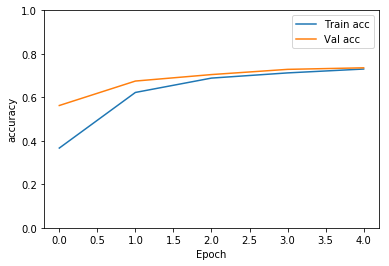

In [18]:
import matplotlib.pyplot as plt
def plot_history(b_history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('accuracy')
 plt.plot(b_history.epoch, np.array(b_history.history['acc']),
 label='Train acc')
 plt.plot(b_history.epoch, np.array(b_history.history['val_acc']),
 label = 'Val acc')
 plt.legend()
 plt.ylim([0, 1])
plot_history(b_history)

In [19]:
#plot_history(l2_history)
print('training acc.:',b_history.history['acc'][-1],'\n','test acc.:', (b_history.history['val_acc'])[-1])

training acc.: 0.7301587304740986 
 test acc.: 0.7357804225866126
